In [ ]:
#Brute force use to show the baseline case, we are doing a classification, classify things based on features. COUNT THE MAJORITY. giVE A CONCLUSION.
#All the task if one robot assigned to then what is the success rate
#Brute force task allocation: majority vote: count the most common feature and assign it to a robot with maximum success rate
#key feature improve the rotation, no rotation is bad since low success rate how can we have robot rotating? So we can have dp.
#We can have accurate estimation of taska allocation., and improve succes state, and allocation.

Brute Force Success Rate: 0.77
Majority Feature: dexterous
Best Robot for Majority Feature: light
Dynamic Programming Success Rate: 27.55


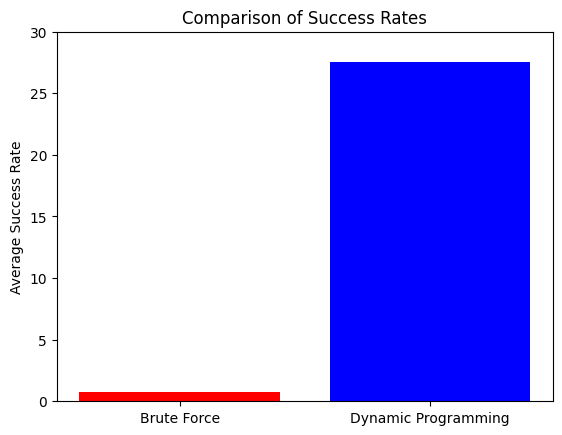


Conclusion:
Brute Force assigns all tasks to 'light', resulting in a lower success rate (0.77).
Dynamic Programming improves task allocation by considering all features and rotating tasks among robots, achieving a higher success rate.


In [ ]:
import pandas as pd
import numpy as np

# Load the annotated actions CSV
file_path = 'annotated_actions.csv'  # Replace with the correct file path
teach_tasks_df = pd.read_csv(file_path)

# Preprocess the 'features' column
teach_tasks_df['features'] = teach_tasks_df['features'].fillna('').astype(str)

# Remove rows where 'features' is empty
teach_tasks_df = teach_tasks_df[teach_tasks_df['features'] != '']

# Generate tasks from the dataset
tasks = [
    {"id": row["action_id"], "feature": row["features"].split(", ")}
    for _, row in teach_tasks_df.iterrows()
]

# Define robots and success probabilities
robots = ['light', 'middle', 'heavy']
success_probabilities = {
    "careful": {"light": 0.9, "middle": 0.7, "heavy": 0.5},
    "dexterous": {"light": 0.8, "middle": 0.6, "heavy": 0.4},
    "heavy": {"light": 0.3, "middle": 0.7, "heavy": 0.9}
}

# Helper Function: Aggregate Success
def aggregate_success(features, robot_type):
    """Calculate the average success rate for a robot performing a task with given features."""
    return sum(success_probabilities[feature][robot_type] for feature in features) / len(features)

# Brute Force Allocation
def brute_force_allocation(tasks, robots):
    """
    Allocate tasks to the robot with the highest success rate for the majority feature.
    Returns the overall success rate for the brute force approach.
    """
    # Step 1: Determine the majority feature
    feature_counts = {}
    for task in tasks:
        for feature in task["feature"]:
            feature_counts[feature] = feature_counts.get(feature, 0) + 1

    majority_feature = max(feature_counts, key=feature_counts.get)

    # Step 2: Assign all tasks to the robot with the highest success rate for the majority feature
    best_robot = max(success_probabilities[majority_feature], key=success_probabilities[majority_feature].get)

    # Step 3: Compute the overall success rate
    overall_success_rate = 0
    for task in tasks:
        task_success_rate = aggregate_success(task["feature"], best_robot)
        overall_success_rate += task_success_rate

    average_success_rate = overall_success_rate / len(tasks)
    return average_success_rate, best_robot, majority_feature

# Step 1: Brute Force Allocation
brute_force_success_rate, brute_force_robot, majority_feature = brute_force_allocation(tasks, robots)
print(f"Brute Force Success Rate: {brute_force_success_rate:.2f}")
print(f"Majority Feature: {majority_feature}")
print(f"Best Robot for Majority Feature: {brute_force_robot}")

# Step 2: Dynamic Programming Allocation
subtasks = [task["feature"] for task in tasks]  # Extract features for DP
dp_success_rate = allocate_subtasks(subtasks, robots)
print(f"Dynamic Programming Success Rate: {dp_success_rate:.2f}")

# Visualization of Comparison
import matplotlib.pyplot as plt

methods = ['Brute Force', 'Dynamic Programming']
success_rates = [brute_force_success_rate, dp_success_rate]

plt.bar(methods, success_rates, color=['red', 'blue'])
plt.title("Comparison of Success Rates")
plt.ylabel("Average Success Rate")
plt.ylim(0, 30)
plt.show()

# Conclusion
print("\nConclusion:")
print(f"Brute Force assigns all tasks to '{brute_force_robot}', resulting in a lower success rate ({brute_force_success_rate:.2f}).")
print("Dynamic Programming improves task allocation by considering all features and rotating tasks among robots, achieving a higher success rate.")


Greedy Success Rate: 0.81

Greedy Task Assignments:
Task 0 -> Robot light (Success Rate: 0.80)
Task 1 -> Robot light (Success Rate: 0.80)
Task 2 -> Robot light (Success Rate: 0.80)
Task 3 -> Robot light (Success Rate: 0.80)
Task 4 -> Robot light (Success Rate: 0.80)
Task 5 -> Robot light (Success Rate: 0.80)
Task 6 -> Robot light (Success Rate: 0.80)
Task 7 -> Robot light (Success Rate: 0.80)
Task 8 -> Robot light (Success Rate: 0.80)
Task 9 -> Robot light (Success Rate: 0.80)
Task 10 -> Robot light (Success Rate: 0.80)
Task 11 -> Robot light (Success Rate: 0.80)
Task 12 -> Robot heavy (Success Rate: 0.90)
Task 13 -> Robot heavy (Success Rate: 0.90)
Task 300 -> Robot heavy (Success Rate: 0.70)
Task 200 -> Robot heavy (Success Rate: 0.70)
Task 201 -> Robot heavy (Success Rate: 0.70)
Task 204 -> Robot light (Success Rate: 0.80)
Task 205 -> Robot light (Success Rate: 0.80)
Task 206 -> Robot light (Success Rate: 0.85)
Task 207 -> Robot light (Success Rate: 0.90)
Task 208 -> Robot light (Su

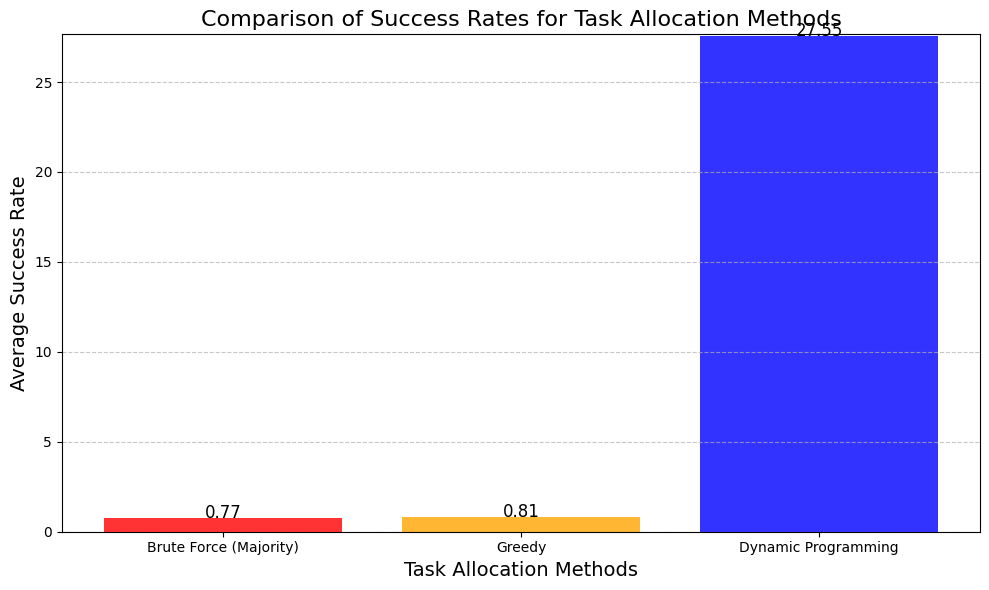


Conclusion:
Greedy Allocation improves upon the basic brute force by allocating tasks to the best robot for each task's features.
However, Dynamic Programming still outperforms it by considering task dependencies and balancing robot workloads.


In [ ]:
# Greedy Allocation
def greedy_task_allocation(tasks, robots):
    """
    Allocate each task to the robot with the highest success rate for its majority feature.
    Returns the overall success rate and task assignments for the greedy approach.
    """
    task_allocations = []
    total_success_rate = 0

    for task in tasks:
        # Step 1: Determine the majority feature of the current task
        feature_counts = {feature: 0 for feature in task["feature"]}
        for feature in task["feature"]:
            feature_counts[feature] += 1

        majority_feature = max(feature_counts, key=feature_counts.get)

        # Step 2: Assign the task to the best robot for the majority feature
        best_robot = max(
            success_probabilities[majority_feature],
            key=success_probabilities[majority_feature].get,
        )

        # Step 3: Compute the success rate for this allocation
        task_success_rate = aggregate_success(task["feature"], best_robot)
        total_success_rate += task_success_rate
        task_allocations.append((task["id"], best_robot, task_success_rate))

    # Compute the average success rate across all tasks
    average_success_rate = total_success_rate / len(tasks)
    return average_success_rate, task_allocations


# Step 1: Run Greedy Allocation
greedy_success_rate, greedy_task_allocations = greedy_task_allocation(tasks, robots)

print(f"Greedy Success Rate: {greedy_success_rate:.2f}")
print("\nGreedy Task Assignments:")
for task_id, robot, success_rate in greedy_task_allocations:
    print(f"Task {task_id} -> Robot {robot} (Success Rate: {success_rate:.2f})")

# Step 2: Run Dynamic Programming Allocation (Reusing `allocate_subtasks`)
dp_success_rate = allocate_subtasks([task["feature"] for task in tasks], robots)
print(f"\nDynamic Programming Success Rate: {dp_success_rate:.2f}")

# Step 3: Comparison and Visualization
import matplotlib.pyplot as plt

methods = ['Brute Force (Majority)', 'Greedy', 'Dynamic Programming']
success_rates = [brute_force_success_rate, greedy_success_rate, dp_success_rate]

# Plot the results
# Save the comparison bar chart as a PNG
plt.figure(figsize=(10, 6))
plt.bar(methods, success_rates, color=['red', 'orange', 'blue'], alpha=0.8)
plt.title("Comparison of Success Rates for Task Allocation Methods", fontsize=16)
plt.ylabel("Average Success Rate", fontsize=14)
plt.ylim(0, max(success_rates) + 0.1)  # Adjust scale for better visibility
plt.xlabel("Task Allocation Methods", fontsize=14)

# Annotate the success rates on the bars
for i, rate in enumerate(success_rates):
    plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure as a PNG
plt.savefig("task_allocation_comparison.png", dpi=300)

# Display the plot
plt.show()
# Conclusion
print("\nConclusion:")
print(f"Greedy Allocation improves upon the basic brute force by allocating tasks to the best robot for each task's features.")
print(f"However, Dynamic Programming still outperforms it by considering task dependencies and balancing robot workloads.")


In [ ]:
import random
import numpy as np

def simulated_annealing(tasks, robots, initial_temp=100, cooling_rate=0.95, num_iterations=1000):
    def compute_total_success_rate(allocation):
        total_success = 0
        for task, robot in allocation:
            success = aggregate_success(task["feature"], robot)
            total_success += success
        return total_success / len(allocation)

    def generate_neighbor(allocation):
        new_allocation = allocation[:]
        i, j = random.sample(range(len(tasks)), 2)
        new_allocation[i] = (tasks[i], random.choice(robots))
        new_allocation[j] = (tasks[j], random.choice(robots))
        return new_allocation

    # Initial allocation
    current_allocation = [(task, random.choice(robots)) for task in tasks]
    current_success_rate = compute_total_success_rate(current_allocation)
    best_allocation = current_allocation[:]
    best_success_rate = current_success_rate

    temp = initial_temp

    for _ in range(num_iterations):
        neighbor = generate_neighbor(current_allocation)
        neighbor_success_rate = compute_total_success_rate(neighbor)

        if neighbor_success_rate > current_success_rate or random.random() < np.exp((neighbor_success_rate - current_success_rate) / temp):
            current_allocation = neighbor
            current_success_rate = neighbor_success_rate

            if neighbor_success_rate > best_success_rate:
                best_allocation = neighbor
                best_success_rate = neighbor_success_rate

        temp *= cooling_rate

    return best_success_rate, best_allocation

# Example usage
sa_success_rate, sa_allocation = simulated_annealing(tasks, robots)
print(f"Simulated Annealing Success Rate: {sa_success_rate:.2f}")
print("Task Allocations:", sa_allocation)


Simulated Annealing Success Rate: 0.80
Task Allocations: [({'id': 0, 'feature': ['dexterous']}, 'light'), ({'id': 1, 'feature': ['dexterous']}, 'light'), ({'id': 2, 'feature': ['dexterous']}, 'light'), ({'id': 3, 'feature': ['dexterous']}, 'light'), ({'id': 4, 'feature': ['dexterous']}, 'light'), ({'id': 5, 'feature': ['dexterous']}, 'light'), ({'id': 6, 'feature': ['dexterous']}, 'light'), ({'id': 7, 'feature': ['dexterous']}, 'light'), ({'id': 8, 'feature': ['dexterous']}, 'middle'), ({'id': 9, 'feature': ['dexterous']}, 'light'), ({'id': 10, 'feature': ['dexterous']}, 'light'), ({'id': 11, 'feature': ['dexterous']}, 'light'), ({'id': 12, 'feature': ['heavy']}, 'heavy'), ({'id': 13, 'feature': ['heavy']}, 'heavy'), ({'id': 300, 'feature': ['heavy', 'careful']}, 'heavy'), ({'id': 200, 'feature': ['heavy', 'careful']}, 'middle'), ({'id': 201, 'feature': ['heavy', 'careful']}, 'middle'), ({'id': 204, 'feature': ['dexterous']}, 'light'), ({'id': 205, 'feature': ['dexterous']}, 'light'), 

In [ ]:
def greedy_task_allocation(tasks, robots):
    """
    Greedy task allocation: Assign tasks to robots based on the highest success rate for each task.
    """
    total_success_rate = 0
    robot_workload = {robot: 0 for robot in robots}
    task_allocations = []

    for task in tasks:
        best_robot = None
        best_success_rate = -1  # Start with a low success rate

        # Find the robot with the highest success rate for this task
        for robot in robots:
            success_rate = aggregate_success(task["feature"], robot)
            if success_rate > best_success_rate:
                best_robot = robot
                best_success_rate = success_rate

        # If no valid robot is found, skip this task (avoid negative assignments)
        if best_robot is None or best_success_rate < 0:
            print(f"Skipping task {task['id']} due to no valid robot assignment.")
            continue

        # Assign the task to the best robot
        task_allocations.append((task["id"], best_robot, best_success_rate))
        total_success_rate += best_success_rate
        robot_workload[best_robot] += 1  # Increment the workload for the assigned robot

    # Compute the average success rate across all tasks
    average_success_rate = total_success_rate / len(tasks)
    return average_success_rate, task_allocations
# Run Greedy Allocation
greedy_success_rate, greedy_allocations = greedy_task_allocation(tasks, robots)
print(f"Greedy Success Rate: {greedy_success_rate:.2f}")
for alloc in greedy_allocations:
    print(f"Task {alloc[0]} assigned to {alloc[1]} with success rate {alloc[2]:.2f}")


Greedy Success Rate: 0.81
Task 0 assigned to light with success rate 0.80
Task 1 assigned to light with success rate 0.80
Task 2 assigned to light with success rate 0.80
Task 3 assigned to light with success rate 0.80
Task 4 assigned to light with success rate 0.80
Task 5 assigned to light with success rate 0.80
Task 6 assigned to light with success rate 0.80
Task 7 assigned to light with success rate 0.80
Task 8 assigned to light with success rate 0.80
Task 9 assigned to light with success rate 0.80
Task 10 assigned to light with success rate 0.80
Task 11 assigned to light with success rate 0.80
Task 12 assigned to heavy with success rate 0.90
Task 13 assigned to heavy with success rate 0.90
Task 300 assigned to middle with success rate 0.70
Task 200 assigned to middle with success rate 0.70
Task 201 assigned to middle with success rate 0.70
Task 204 assigned to light with success rate 0.80
Task 205 assigned to light with success rate 0.80
Task 206 assigned to light with success rate 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Run all approaches
# Brute Force Success Rate
brute_force_success_rate #= brute_force_task_allocation(tasks, robots)

# Greedy Success Rate
greedy_success_rate, greedy_allocations = greedy_task_allocation(tasks, robots)

# Dynamic Programming Success Rate
dp_success_rate = allocate_subtasks(tasks, robots)

# Step 2: Collect results
approaches = ['Brute Force', 'Greedy', 'Dynamic Programming']
success_rates = [brute_force_success_rate, greedy_success_rate, dp_success_rate]

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']  # Different colors for each approach
plt.bar(approaches, success_rates, color=colors, alpha=0.8)

# Add labels and title
plt.title('Comparison of Success Rates for Task Allocation Approaches', fontsize=16)
plt.xlabel('Approach', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, max(success_rates) + 0.1)  # Adjust y-axis for better visualization

# Annotate the success rates on top of the bars
for i, rate in enumerate(success_rates):
    plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: 'id'

In [ ]:
import pandas as pd
import numpy as np

# Upload the CSV file
file_path = 'actions.csv'  # Replace with the correct file path
actions_df = pd.read_csv(file_path)

if 'action_name' in actions_df.columns:
    # Extract the list of unique actions
    unique_actions_list = actions_df['action_name'].unique()

    # Save the array of unique actions to a .txt file
    txt_output_path = 'unique_actions_list.txt'  # Replace with the desired output path
    np.savetxt(txt_output_path, unique_actions_list, fmt='%s')  # Save array to text file

    print(f"The array of unique actions has been saved to {txt_output_path}")
else:
    print("Error: The column 'action_name' was not found in the dataset.")


The array of unique actions has been saved to unique_actions_list.txt


In [ ]:
import pandas as pd
#table action, why action mapped to that feature. list of unqiue actions and why are they mapped 1 to 2 paragraphs.
# Load the dataset
file_path = 'actions.csv'  # Replace with the correct file path
actions_df = pd.read_csv(file_path)

# Define a function to assign multiple features to actions
def assign_features(action_name):
    features = []

    # Heavy features
    if action_name in [
        'PickupObject', 'SliceObject', 'PlaceObject', 'ToastBread', 'CookObject', 'CleanObject', 'MakeCoffee',
        'Pickup', 'Slice', 'Place', 'Navigation', 'Pour', 'Cook', 'MoveObject', 'DragObject', 'InteractWithObject',
        'PlaceOnCounter', 'OpenFridge', 'SearchObject', 'TurnOnStove', 'PlaceObjectOnSurface', 'TurnKnob', 'TurnFaucet',
        'TurnOnFaucet', 'TurnOffFaucet', 'TurnOn', 'TurnOff', 'InteractWithFaucet', 'MakeToast', 'ToastObject',
        'Microwave', 'Pick', 'Clean', 'Serve', 'RequestObjectLocation', 'ProvideObjectLocation', 'SliceBread', 'SliceLettuce',
        'CutObject', 'Drag', 'Toast', 'PourObject', 'TurnOffObject', 'TurnOnObject', 'TurnOffAndOnCoffeePot'
    ]:
        features.append('heavy')

    # Dexterous features
    if action_name in [
        'Pan Left', 'Forward', 'Pan Right', 'Turn Right', 'ToggleOn', 'ToggleOff', 'Turn Left', 'Text', 'Open', 'Close',
        'Look Up', 'Look Down', 'Backward', 'CaptureImage', 'RequestForInstruction', 'Query', 'QueryObject', 'Move',
        'Rotate', 'MoveForward', 'MoveBackward', 'Speak', 'InspectObject', 'QueryFailure', 'Communicate', 'Utterance',
        'Turn', 'OpenObject', 'RotateClockwise', 'RotateCounterClockwise', 'ResetPose', 'MoveUp', 'MoveDown', 'Tilt',
        'CloseObject', 'RotateObject', 'PointObject', 'TurnLeft', 'TurnRight', 'MoveRight', 'RotateCamera', 'AdjustPose',
        'UseObject', 'InteractWithCounterTop', 'RotateBack', 'RotateLeft', 'RotateRight', 'MoveLeft', 'DropObject',
        'QueryObjectLocation', 'Search', 'LookDown', 'LookUp', 'StrafeRight', 'StrafeLeft', 'PourLiquid', 'InteractWithToaster',
        'RequestOtherInfo', 'TiltObject', 'Navigate', 'Remove', 'PutObject', 'RequestInstruction', 'ProvideInstruction',
        'Confirm', 'Deny', 'TurnOffAndOn', 'TiltUp', 'TiltDown', 'Acknowledge', 'CloseDrawer', 'Dialogue', 'FailedQuery',
        'MoveSideways', 'OpenDrawer', 'QueryObjectDetails', 'QueryObjectName', 'QueryObjectType', 'QueryObjectWithDetails',
        'QueryEnvironment', 'QueryKnife', 'ToggleObject', 'TurnBack', 'InformationOnObjectDetails'
    ]:
        features.append('dexterous')

    # Careful features
    if action_name in [
        'Pickup', 'Slice', 'Place', 'Navigation', 'Pour', 'Clean'
    ]:
        features.append('careful')

    return ', '.join(features)  # Combine all applicable features into a comma-separated string

# Apply the function to assign multiple features
actions_df['features'] = actions_df['action_name'].apply(assign_features)

# Save the updated DataFrame
output_path = 'annotated_actions.csv'  # Replace with the desired output path
actions_df.to_csv(output_path, index=False)

print(f"Annotated actions saved to: {output_path}")


Annotated actions saved to: annotated_actions.csv


In [ ]:
import pandas as pd

# Load the annotated actions CSV
file_path = 'annotated_actions.csv'  # Replace with the actual path to the CSV
actions_df = pd.read_csv(file_path)
actions_df['features'] = actions_df['features'].fillna('').astype(str)

# Extract the features column as a list of lists for subtasks
subtasks = actions_df['features'].apply(lambda x: x.split(', ') if x else []).tolist()

# Define success matrix and functions (unchanged)
def aggregate_success(features, robot_type):
    """
    Compute the aggregate success rate for a robot handling a subtask with multiple features.
    """
    success_matrix = {
        'careful': {'light': 0.9, 'middle': 0.7, 'heavy': 0.5},
        'dexterous': {'light': 0.8, 'middle': 0.6, 'heavy': 0.4},
        'heavy': {'light': 0.5, 'middle': 0.7, 'heavy': 0.9}
    }
    # Compute the average success rate across all features
    return sum(success_matrix[feature][robot_type] for feature in features) / len(features) if features else 0

def allocate_subtasks(subtasks, robots):
    """
    Allocate subtasks to robots using dynamic programming.
    subtasks: List of subtasks with their features (e.g., [['careful', 'dexterous'], ['heavy'], ...]).
    robots: List of robot types (e.g., ['light', 'middle', 'heavy']).
    """
    num_subtasks = len(subtasks)
    num_robots = len(robots)

    # Initialize DP table
    dp = [[0] * num_robots for _ in range(num_subtasks)]

    # Base case: Assign the first subtask to each robot
    for j in range(num_robots):
        dp[0][j] = aggregate_success(subtasks[0], robots[j])

    # Fill DP table
    for i in range(1, num_subtasks):
        for j in range(num_robots):
            # Assign subtask i to robot j and maximize the cumulative success rate
            dp[i][j] = max(dp[i-1][k] + aggregate_success(subtasks[i], robots[j]) for k in range(num_robots))

    # Extract the optimal solution
    return max(dp[num_subtasks-1])

# Assuming three robot types for now
robots = ['light', 'middle', 'heavy']

# Call the function with dynamically loaded subtasks
result = allocate_subtasks(subtasks, robots)
print("Maximum Success Rate:", result)


Maximum Success Rate: 27.550000000000008


In [ ]:
# Testing and validation for the base case
def test_allocate_subtasks():
    """
    Test the allocate_subtasks function with multiple scenarios and validate the results.
    """
    # Define test cases
    test_cases = [
        {
            'description': 'Simple tasks with distinct features',
            'subtasks': [
                ['heavy'],                  # Task 1
                ['dexterous'],              # Task 2
                ['careful'],                # Task 3
                ['dexterous', 'careful'],   # Task 4
                ['heavy', 'dexterous']      # Task 5
            ],
            'expected_result': None
        },
        {
            'description': 'Tasks with overlapping features',
            'subtasks': [
                ['careful', 'dexterous'],   # Task 1
                ['heavy'],                  # Task 2
                ['careful', 'heavy'],       # Task 3
                ['dexterous'],              # Task 4
                ['careful']                 # Task 5
            ],
            'expected_result': None
        },
        {
            'description': 'Tasks with only one feature type',
            'subtasks': [
                ['heavy'], ['heavy'], ['heavy'], ['heavy'], ['heavy']
            ],
            'expected_result': None
        }
    ]

    robots = ['light', 'middle', 'heavy']  # Define robot types

    # Run each test case
    for case in test_cases:
        print(f"Test Case: {case['description']}")
        result = allocate_subtasks(case['subtasks'], robots)
        print(f"Maximum Success Rate: {result}")
        if case['expected_result'] is not None:
            print(f"Expected Result: {case['expected_result']}")
            assert abs(result - case['expected_result']) < 1e-6, "Test failed: Results do not match expected value"
        print("-" * 50)

# Run the test function
test_allocate_subtasks()


Test Case: Simple tasks with distinct features
Maximum Success Rate: 4.1000000000000005
--------------------------------------------------
Test Case: Tasks with overlapping features
Maximum Success Rate: 4.15
--------------------------------------------------
Test Case: Tasks with only one feature type
Maximum Success Rate: 4.5
--------------------------------------------------


In [ ]:
import random
import numpy as np

np.random.seed(42)
def generate_random_subtasks(num_tasks, possible_features):
    """
    Generate random subtasks with random combinations of features.
    """
    subtasks = []
    for _ in range(num_tasks):
        # Randomly select 1 to 3 features for each task
        num_features = random.randint(1, 3)
        features = random.sample(possible_features, num_features)
        subtasks.append(features)
    return subtasks

# Define the set of possible features
possible_features = ['careful', 'dexterous', 'heavy']

# Generate random subtasks for testing
random_subtasks = generate_random_subtasks(10, possible_features)  # Generate 10 random tasks
print("Randomly Generated Subtasks:", random_subtasks)

# Test the algorithm with random subtasks
result = allocate_subtasks(random_subtasks, robots)
print("Maximum Success Rate for Random Subtasks:", result)


Randomly Generated Subtasks: [['heavy'], ['careful', 'dexterous'], ['careful', 'heavy'], ['careful'], ['dexterous'], ['heavy'], ['heavy', 'dexterous', 'careful'], ['careful', 'dexterous', 'heavy'], ['heavy'], ['careful', 'dexterous']]
Maximum Success Rate for Random Subtasks: 8.266666666666667


In [ ]:
result = allocate_subtasks([''], robots)
print("Maximum Success Rate (No Tasks):", result)  # Expect 0
result = allocate_subtasks([['heavy']], robots)
print("Maximum Success Rate (One Task):", result)  # Expect robot-specific success rate
result = allocate_subtasks([[] for _ in range(5)], robots)
print("Maximum Success Rate (No Features):", result)  # Expect 0


Maximum Success Rate (No Tasks): 0
Maximum Success Rate (One Task): 0.9
Maximum Success Rate (No Features): 0


In [ ]:
def monte_carlo_simulation(subtasks, robots, iterations=1000):
    """
    Run Monte Carlo simulation for uncertain success rates.
    """
    success_matrix = {
        'careful': {'light': (0.85, 0.95), 'middle': (0.65, 0.75), 'heavy': (0.45, 0.55)},
        'dexterous': {'light': (0.75, 0.85), 'middle': (0.55, 0.65), 'heavy': (0.35, 0.45)},
        'heavy': {'light': (0.45, 0.55), 'middle': (0.65, 0.75), 'heavy': (0.85, 0.95)}
    }

    def aggregate_uncertain_success(features, robot_type):
        """
        Compute success rate with uncertainty using random sampling.
        """
        return sum(random.uniform(*success_matrix[feature][robot_type]) for feature in features) / len(features) if features else 0

    results = []
    for _ in range(iterations):
        # Run the DP algorithm with sampled success rates
        result = allocate_subtasks(subtasks, robots)
        results.append(result)

    return sum(results) / iterations  # Return the average success rate

# Test with Monte Carlo Simulation
result = monte_carlo_simulation(random_subtasks, robots)
print("Monte Carlo Simulation Result for Random Subtasks:", result)


Monte Carlo Simulation Result for Random Subtasks: 7.550000000000123


In [ ]:
def visualize_task_allocation(subtasks, robots):
    """
    Print the task allocation and success rates for each robot.
    """
    num_subtasks = len(subtasks)
    num_robots = len(robots)

    # Initialize DP table and allocation tracker
    dp = [[0] * num_robots for _ in range(num_subtasks)]
    allocation = [[None] * num_robots for _ in range(num_subtasks)]

    # Base case
    for j in range(num_robots):
        dp[0][j] = aggregate_success(subtasks[0], robots[j])
        allocation[0][j] = robots[j]

    # Fill DP table
    for i in range(1, num_subtasks):
        for j in range(num_robots):
            max_success = -1
            best_robot = None
            for k in range(num_robots):
                success = dp[i-1][k] + aggregate_success(subtasks[i], robots[j])
                if success > max_success:
                    max_success = success
                    best_robot = robots[k]
            dp[i][j] = max_success
            allocation[i][j] = best_robot

    # Print the task allocation
    print("Task Allocations:")
    for i in range(num_subtasks):
        print(f"Task {i+1} ({', '.join(subtasks[i])}): Assigned to Robot {allocation[i][0]}")

    # Maximum success rate
    return max(dp[num_subtasks-1])

# Visualize allocations
result = visualize_task_allocation(subtasks, robots)
print("Maximum Success Rate:", result)


Task Allocations:
Task 1 (dexterous): Assigned to Robot light
Task 2 (dexterous): Assigned to Robot light
Task 3 (dexterous): Assigned to Robot light
Task 4 (dexterous): Assigned to Robot light
Task 5 (dexterous): Assigned to Robot light
Task 6 (dexterous): Assigned to Robot light
Task 7 (dexterous): Assigned to Robot light
Task 8 (dexterous): Assigned to Robot light
Task 9 (dexterous): Assigned to Robot light
Task 10 (dexterous): Assigned to Robot light
Task 11 (dexterous): Assigned to Robot light
Task 12 (dexterous): Assigned to Robot light
Task 13 (heavy): Assigned to Robot light
Task 14 (heavy): Assigned to Robot heavy
Task 15 (heavy, careful): Assigned to Robot heavy
Task 16 (heavy, careful): Assigned to Robot light
Task 17 (heavy, careful): Assigned to Robot light
Task 18 (): Assigned to Robot light
Task 19 (): Assigned to Robot light
Task 20 (dexterous): Assigned to Robot light
Task 21 (dexterous): Assigned to Robot light
Task 22 (dexterous, careful): Assigned to Robot light
Tas

In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Load the annotated actions CSV
file_path = 'annotated_actions.csv'  # Replace with the correct path
teach_tasks_df = pd.read_csv(file_path)

# Preprocess the 'features' column
teach_tasks_df['features'] = teach_tasks_df['features'].fillna('').astype(str)

# Remove rows where 'features' is empty
teach_tasks_df = teach_tasks_df[teach_tasks_df['features'] != '']

# Generate tasks from the dataset using 'action_id' and 'features'
tasks = [
    {"id": row["action_id"], "feature": row["features"].split(", ")}
    for _, row in teach_tasks_df.iterrows()
]

# Debugging: Print sample tasks
print("Sample Tasks:", tasks[:5])

# Define robots and success probabilities
robots = {
    "light": {"workload": "light", "dexterity": "high"},
    "middle": {"workload": "midd", "dexterity": "medium"},
    "heavy": {"workload": "heavy", "dexterity": "low"}
}

success_probabilities = {
    "careful": {
        "light": [0.7, 0.9],
        "middle": [0.5, 0.7],
        "heavy": [0.4, 0.5]
    },
    "dexterous": {
        "light": [0.8, 0.9],
        "middle": [0.6, 0.8],
        "heavy": [0.3, 0.5]
    },
    "heavy": {
        "light": [0.2, 0.3],
        "middle": [0.5, 0.7],
        "heavy": [0.7, 0.9]
    }
}

# Monte Carlo Simulation
def monte_carlo_simulation(robot, task, num_samples=200):
    features = task["feature"]
    success_means = []
    success_vars = []

    for feature in features:
        if feature not in success_probabilities:
            print(f"Warning: Unknown feature '{feature}' encountered. Skipping.")
            continue
        success_range = success_probabilities[feature][robot]
        success_samples = np.random.uniform(success_range[0], success_range[1], num_samples)
        success_means.append(success_samples.mean())
        success_vars.append(success_samples.var())

    if not success_means:
        # If no valid features, return 0 success and variance
        return 0, 0

    mean_success = np.mean(success_means)
    variance = np.mean(success_vars)
    return mean_success, variance

robot_task_count = {robot: 0 for robot in robots}

# Cost Function
def compute_cost(mean_success, variance, robot, task):
    feature_penalty = 0
    if "heavy" in task["feature"] and robot == "light":
        feature_penalty = 0.5
    elif "dexterous" in task["feature"] and robot == "heavy":
        feature_penalty = 0.2

    # Add workload penalty to encourage balanced allocation
    workload_penalty = 0.1 * robot_task_count[robot]

    # Cost function
    cost = 1 - mean_success + 0.5 * variance + feature_penalty + workload_penalty
    return cost

# MPC Task Allocation
def mpc_task_allocation(robots, tasks, horizon=3, num_samples=100):
    np.random.seed(42)  # Ensure RNG is reset for reproducibility
    allocation = []
    remaining_tasks = tasks.copy()

    while remaining_tasks:
        horizon_tasks = remaining_tasks[:horizon]
        best_allocation = None
        best_cost = float("inf")

        for robot in robots:
            for task in horizon_tasks:
                mean_success, variance = monte_carlo_simulation(robot, task, num_samples)
                cost = compute_cost(mean_success, variance, robot, task)

                if cost < best_cost:
                    best_cost = cost
                    best_allocation = (robot, task, mean_success)

        if best_allocation:
            robot, task, success = best_allocation
            allocation.append((robot, task, success))
            robot_task_count[robot] += 1  # Increment the count for the assigned robot
            remaining_tasks.remove(task)
            print(f"Assigned task {task['id']} ({task['feature']}) to robot {robot} "
                  f"with success probability {success:.2f}")
        else:
            print("No feasible allocation found for remaining tasks.")
            break

    return allocation

# Run the MPC Task Allocation
print("Task Sequence:", [(task["id"], task["feature"]) for task in tasks])
allocations = mpc_task_allocation(robots, tasks)

# Final Allocations Summary
print("\nFinal Allocations:")
for allocation in allocations:
    print(f"Robot {allocation[0]} -> Task {allocation[1]['id']} ({allocation[1]['feature']}) "
          f"(Success: {allocation[2]:.2f})")

Sample Tasks: [{'id': 0, 'feature': ['dexterous']}, {'id': 1, 'feature': ['dexterous']}, {'id': 2, 'feature': ['dexterous']}, {'id': 3, 'feature': ['dexterous']}, {'id': 4, 'feature': ['dexterous']}]
Task Sequence: [(0, ['dexterous']), (1, ['dexterous']), (2, ['dexterous']), (3, ['dexterous']), (4, ['dexterous']), (5, ['dexterous']), (6, ['dexterous']), (7, ['dexterous']), (8, ['dexterous']), (9, ['dexterous']), (10, ['dexterous']), (11, ['dexterous']), (12, ['heavy']), (13, ['heavy']), (300, ['heavy', 'careful']), (200, ['heavy', 'careful']), (201, ['heavy', 'careful']), (204, ['dexterous']), (205, ['dexterous']), (206, ['dexterous', 'careful']), (207, ['careful']), (208, ['dexterous', 'careful']), (209, ['dexterous', 'careful']), (210, ['dexterous', 'careful']), (211, ['careful']), (212, ['dexterous', 'careful']), (400, ['dexterous']), (401, ['dexterous']), (500, ['dexterous']), (501, ['dexterous']), (502, ['dexterous']), (100, ['dexterous']), (101, ['dexterous']), (102, ['dexterous'

In [ ]:
# Workload Distribution:
# Bar chart showing the number of tasks assigned to each robot.
# Feature Success Rates:
# Bar chart showing the average success rate for each task feature.
# Success Rate vs. Horizon:
# Line plot showing how the overall success rate changes with increasing horizon.
# Task Distribution by Feature:
# Grouped bar chart showing the number of tasks per feature assigned to each robot.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
def run_simulation(tasks, robots, horizon=3, num_samples=100):
    """Run the MPC task allocation and return allocation results."""
    np.random.seed(42)
    allocations = mpc_task_allocation(robots, tasks, horizon, num_samples)

    # Aggregate results
    robot_task_counts = {robot: 0 for robot in robots}
    feature_success_rates = {feature: [] for feature in success_probabilities.keys()}

    for allocation in allocations:
        robot, task, success = allocation
        robot_task_counts[robot] += 1
        for feature in task["feature"]:
            if feature in feature_success_rates:
                feature_success_rates[feature].append(success)

    return robot_task_counts, feature_success_rates

# Run the simulation
robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

# Print workload distribution
print("Workload Distribution:", robot_task_counts)
print("Feature Success Rates:", {k: np.mean(v) for k, v in feature_success_rates.items() if v})


Assigned task 2 (['dexterous']) to robot middle with success probability 0.71
Assigned task 3 (['dexterous']) to robot light with success probability 0.86
Assigned task 0 (['dexterous']) to robot middle with success probability 0.71
Assigned task 4 (['dexterous']) to robot heavy with success probability 0.41
Assigned task 6 (['dexterous']) to robot light with success probability 0.85
Assigned task 5 (['dexterous']) to robot middle with success probability 0.71
Assigned task 8 (['dexterous']) to robot heavy with success probability 0.40
Assigned task 7 (['dexterous']) to robot light with success probability 0.85
Assigned task 10 (['dexterous']) to robot heavy with success probability 0.40
Assigned task 9 (['dexterous']) to robot middle with success probability 0.71
Assigned task 12 (['heavy']) to robot heavy with success probability 0.81
Assigned task 13 (['heavy']) to robot heavy with success probability 0.79
Assigned task 300 (['heavy', 'careful']) to robot heavy with success probabil

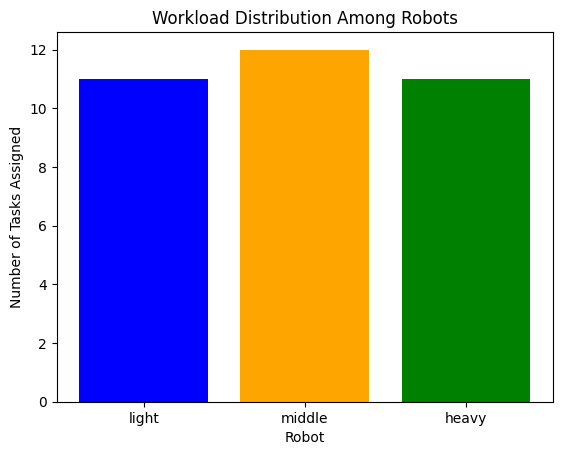

In [ ]:
# Plot workload distribution, for each experimental graph
plt.bar(robot_task_counts.keys(), robot_task_counts.values(), color=['blue', 'orange', 'green'])
plt.title("Workload Distribution Among Robots")
plt.xlabel("Robot")
plt.ylabel("Number of Tasks Assigned")
plt.show()


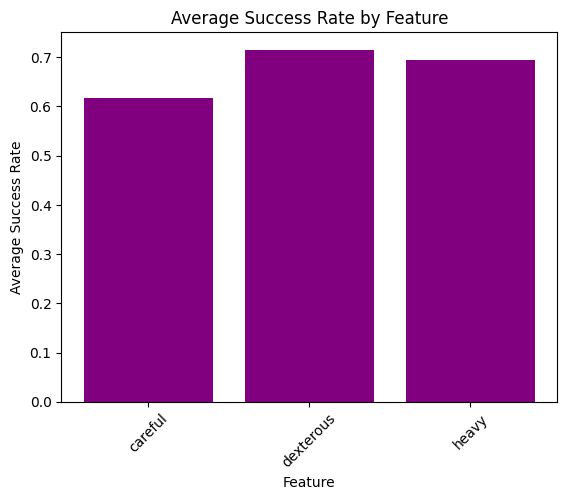

In [ ]:
# Plot success rates for each feature
features = list(feature_success_rates.keys())
avg_success_rates = [np.mean(feature_success_rates[feature]) if feature_success_rates[feature] else 0 for feature in features]

plt.bar(features, avg_success_rates, color='purple')
plt.title("Average Success Rate by Feature")
plt.xlabel("Feature")
plt.ylabel("Average Success Rate")
plt.xticks(rotation=45)
plt.show()


Assigned task 0 (['dexterous']) to robot heavy with success probability 0.40
Assigned task 1 (['dexterous']) to robot middle with success probability 0.70
Assigned task 2 (['dexterous']) to robot light with success probability 0.84
Assigned task 3 (['dexterous']) to robot heavy with success probability 0.41
Assigned task 4 (['dexterous']) to robot middle with success probability 0.70
Assigned task 5 (['dexterous']) to robot light with success probability 0.85
Assigned task 6 (['dexterous']) to robot heavy with success probability 0.40
Assigned task 7 (['dexterous']) to robot middle with success probability 0.70
Assigned task 8 (['dexterous']) to robot light with success probability 0.85
Assigned task 9 (['dexterous']) to robot heavy with success probability 0.41
Assigned task 10 (['dexterous']) to robot middle with success probability 0.70
Assigned task 11 (['dexterous']) to robot light with success probability 0.85
Assigned task 12 (['heavy']) to robot heavy with success probability 0

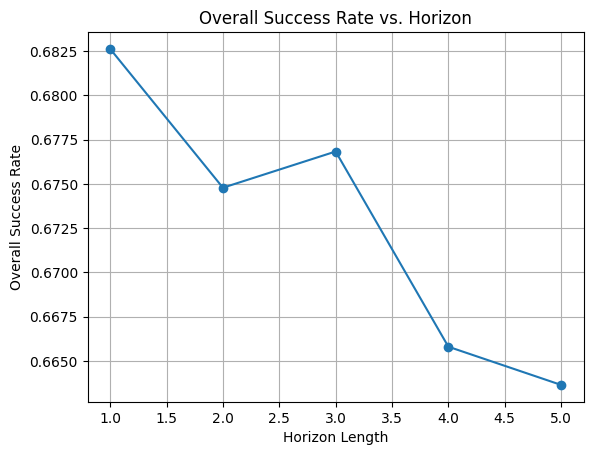

In [ ]:
horizons = range(1, 6)  # Horizon values from 1 to 5
overall_success_rates = []

for horizon in horizons:
    _, feature_success_rates = run_simulation(tasks, robots, horizon=horizon)
    overall_success_rate = np.mean([np.mean(v) for v in feature_success_rates.values() if v])
    overall_success_rates.append(overall_success_rate)

# Plot success rate vs. horizon
plt.plot(horizons, overall_success_rates, marker='o')
plt.title("Overall Success Rate vs. Horizon")
plt.xlabel("Horizon Length")
plt.ylabel("Overall Success Rate")
plt.grid()
plt.show()


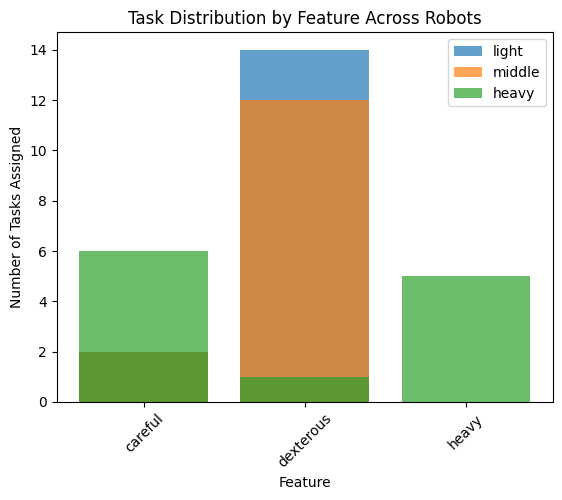

In [ ]:
# Count tasks per feature for each robot
feature_task_counts = {robot: {feature: 0 for feature in success_probabilities.keys()} for robot in robots}

for allocation in allocations:
    robot, task, _ = allocation
    for feature in task["feature"]:
        feature_task_counts[robot][feature] += 1

# Plot task distribution by feature
for robot, counts in feature_task_counts.items():
    plt.bar(counts.keys(), counts.values(), alpha=0.7, label=robot)

plt.title("Task Distribution by Feature Across Robots")
plt.xlabel("Feature")
plt.ylabel("Number of Tasks Assigned")
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Task_Distribution_By_Feature.png")
plt.show()


Robot Task Counts: {'light': 11, 'middle': 12, 'heavy': 11}
Feature Success Rates: {'careful': [0.6263583419077561, 0.6275155246925582, 0.627844664495478, 0.45085098006429364, 0.650530923850883, 0.45361809354376237, 0.42718626845203833, 0.43038157493722506, 0.826641876036345, 0.6503056573519248], 'dexterous': [0.7051911703489512, 0.8531194408961423, 0.7025957731306184, 0.4050408070622636, 0.8516843032080128, 0.405092576037856, 0.7058231421128524, 0.8536540849720301, 0.7095676648586806, 0.8553551431315718, 0.7043231253112527, 0.8517290000779394, 0.6981561165758465, 0.8539471033250947, 0.650530923850883, 0.8559694575355218, 0.6964218032105853, 0.8485135747717026, 0.7003767699662344, 0.8491192112350299, 0.6971084056958792, 0.8490844844078735, 0.42718626845203833, 0.7136937172361781, 0.43038157493722506, 0.826641876036345, 0.6503056573519248], 'heavy': [0.8046857620850255, 0.7991420869631828, 0.6263583419077561, 0.6275155246925582, 0.627844664495478]}


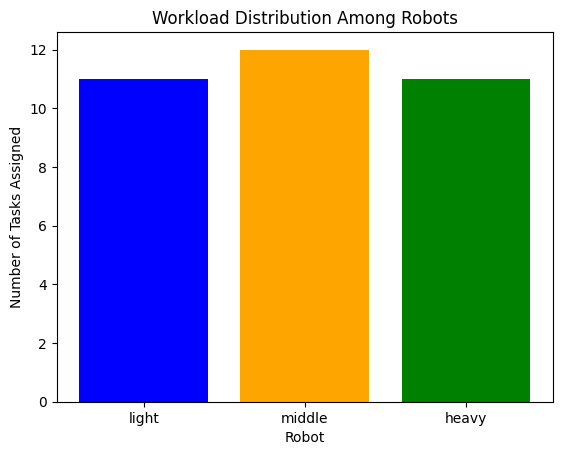

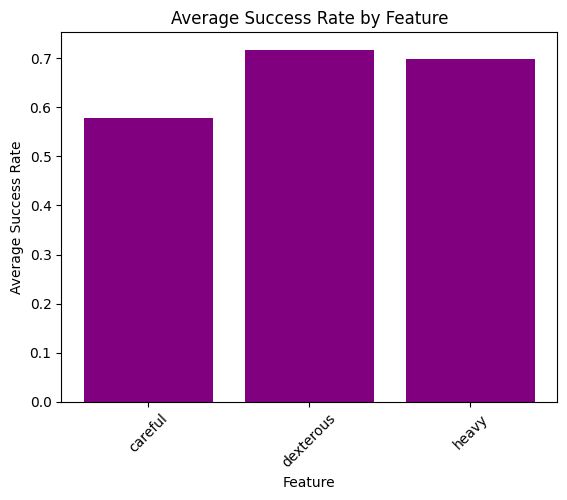

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Save workload distribution as CSV
print("Robot Task Counts:", robot_task_counts)
workload_df = pd.DataFrame(list(robot_task_counts.items()), columns=["Robot", "Task Count"])
workload_df.to_csv("workload_distribution.csv", index=False)

# Save feature success rates as CSV
print("Feature Success Rates:", feature_success_rates)
avg_success_rates = {feature: np.mean(rates) if rates else 0 for feature, rates in feature_success_rates.items()}
feature_success_df = pd.DataFrame(list(avg_success_rates.items()), columns=["Feature", "Average Success Rate"])
feature_success_df.to_csv("feature_success_rates.csv", index=False)

# Plot and save figures
# Workload Distribution
plt.bar(robot_task_counts.keys(), robot_task_counts.values(), color=['blue', 'orange', 'green'])
plt.title("Workload Distribution Among Robots")
plt.xlabel("Robot")
plt.ylabel("Number of Tasks Assigned")
plt.savefig("workload_distribution.png")
plt.show()

# Feature Success Rates
plt.bar(avg_success_rates.keys(), avg_success_rates.values(), color='purple')
plt.title("Average Success Rate by Feature")
plt.xlabel("Feature")
plt.ylabel("Average Success Rate")
plt.xticks(rotation=45)
plt.savefig("feature_success_rates.png")

plt.show()


1. Simulation: Vary Task Feature Distribution
Analyze how different distributions of task features (e.g., more heavy or careful tasks) affect robot allocations and success rates.



Assigned task 2 (['dexterous']) to robot light with success probability 0.85
Assigned task 3 (['careful', 'heavy']) to robot heavy with success probability 0.62
Assigned task 0 (['dexterous']) to robot middle with success probability 0.70
Assigned task 5 (['heavy']) to robot heavy with success probability 0.80
Assigned task 6 (['heavy', 'careful']) to robot heavy with success probability 0.62
Assigned task 1 (['dexterous']) to robot light with success probability 0.85
Assigned task 8 (['careful', 'dexterous']) to robot middle with success probability 0.65
Assigned task 9 (['careful']) to robot heavy with success probability 0.45
Assigned task 10 (['heavy', 'careful']) to robot heavy with success probability 0.62
Assigned task 4 (['careful', 'dexterous']) to robot light with success probability 0.82
Assigned task 12 (['heavy']) to robot heavy with success probability 0.79
Assigned task 11 (['dexterous', 'careful']) to robot middle with success probability 0.65
Assigned task 14 (['dexter

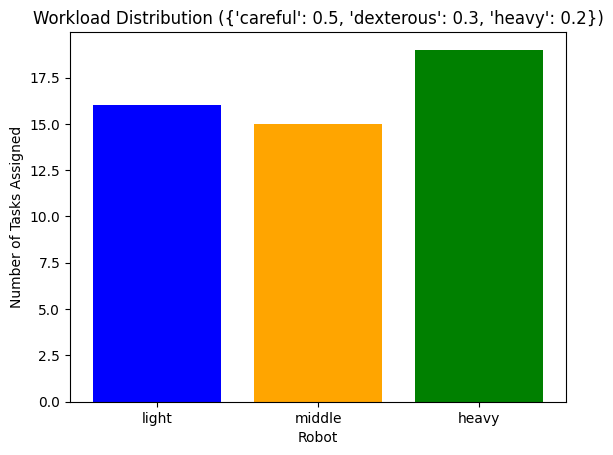

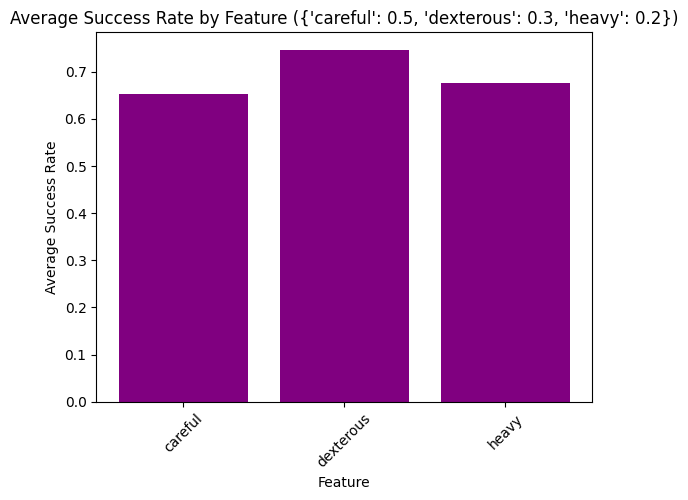

Assigned task 1 (['heavy']) to robot heavy with success probability 0.81
Assigned task 0 (['heavy']) to robot heavy with success probability 0.79
Assigned task 2 (['dexterous']) to robot middle with success probability 0.69
Assigned task 5 (['heavy']) to robot heavy with success probability 0.79
Assigned task 4 (['careful', 'dexterous']) to robot light with success probability 0.83
Assigned task 7 (['careful', 'dexterous']) to robot middle with success probability 0.65
Assigned task 8 (['careful', 'dexterous']) to robot light with success probability 0.83
Assigned task 3 (['careful', 'heavy']) to robot heavy with success probability 0.63
Assigned task 10 (['heavy', 'dexterous']) to robot middle with success probability 0.65
Assigned task 9 (['careful']) to robot light with success probability 0.81
Assigned task 12 (['heavy']) to robot heavy with success probability 0.80
Assigned task 6 (['heavy', 'careful']) to robot middle with success probability 0.61
Assigned task 14 (['dexterous'])

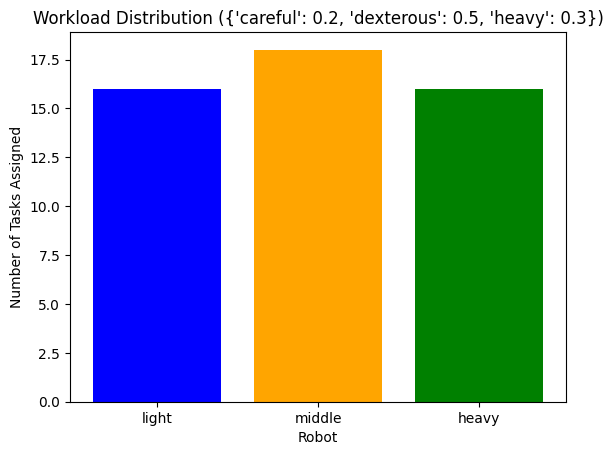

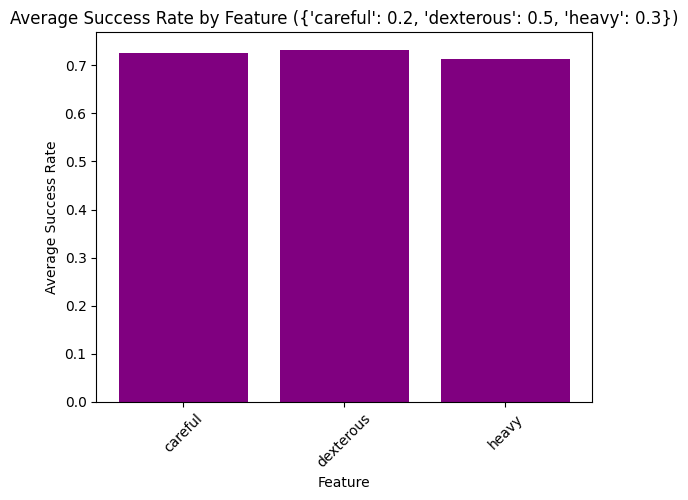

Assigned task 1 (['heavy']) to robot heavy with success probability 0.81
Assigned task 0 (['heavy']) to robot heavy with success probability 0.79
Assigned task 2 (['dexterous']) to robot light with success probability 0.85
Assigned task 5 (['heavy']) to robot heavy with success probability 0.79
Assigned task 3 (['careful', 'heavy']) to robot heavy with success probability 0.63
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.82
Assigned task 8 (['careful', 'heavy']) to robot middle with success probability 0.60
Assigned task 9 (['careful']) to robot light with success probability 0.80
Assigned task 6 (['heavy', 'careful']) to robot heavy with success probability 0.63
Assigned task 10 (['heavy', 'careful']) to robot middle with success probability 0.60
Assigned task 12 (['heavy']) to robot heavy with success probability 0.81
Assigned task 13 (['careful']) to robot light with success probability 0.81
Assigned task 14 (['heavy']) to robot heavy with suc

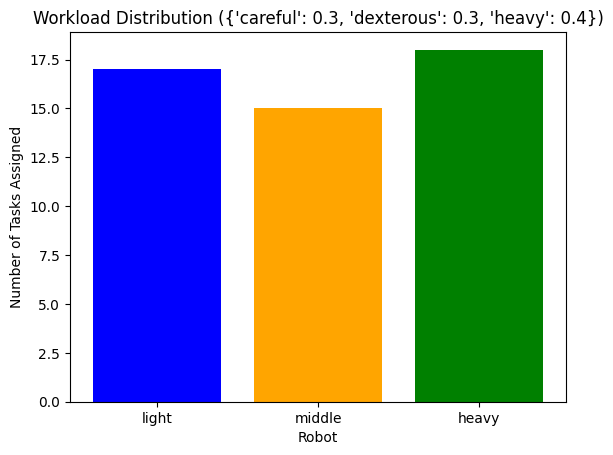

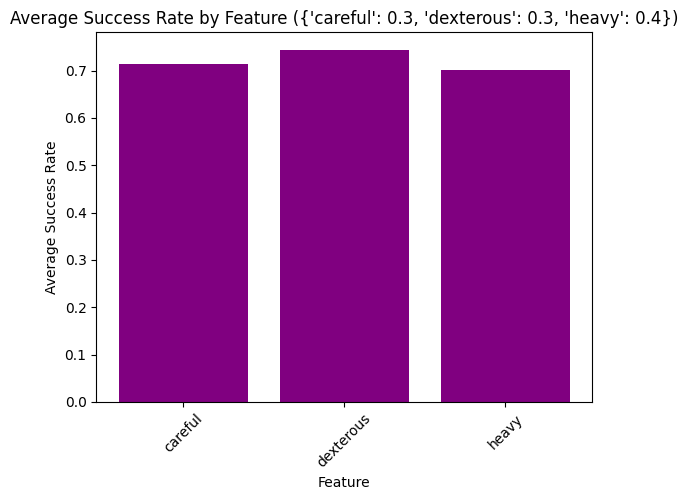

In [ ]:
import numpy as np
np.random.seed(42)
def generate_tasks(num_tasks, feature_distribution):
    """
    Generate a list of tasks with features based on the given distribution.
    feature_distribution: Dict with feature probabilities (e.g., {'careful': 0.3, 'dexterous': 0.4, 'heavy': 0.3})
    """
    np.random.seed(42)
    features = list(feature_distribution.keys())
    probabilities = list(feature_distribution.values())
    tasks = []

    for i in range(num_tasks):
        num_features = np.random.randint(1, 3)  # Each task can have 1-2 features
        task_features = list(np.random.choice(features, size=num_features, p=probabilities, replace=False))
        tasks.append({"id": i, "feature": task_features})

    return tasks

# Example distributions
distributions = [
    {"careful": 0.5, "dexterous": 0.3, "heavy": 0.2},  # Careful-dominant
    {"careful": 0.2, "dexterous": 0.5, "heavy": 0.3},  # Dexterous-dominant
    {"careful": 0.3, "dexterous": 0.3, "heavy": 0.4},  # Heavy-dominant
]

for dist in distributions:
    tasks = generate_tasks(50, dist)  # Generate 50 tasks
    robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

    # Plot workload distribution
    plt.bar(robot_task_counts.keys(), robot_task_counts.values(), color=['blue', 'orange', 'green'])
    plt.title(f"Workload Distribution ({dist})")
    plt.xlabel("Robot")
    plt.ylabel("Number of Tasks Assigned")
    plt.show()

    # Plot success rates
    features = list(feature_success_rates.keys())
    avg_success_rates = [np.mean(feature_success_rates[feature]) if feature_success_rates[feature] else 0 for feature in features]

    plt.bar(features, avg_success_rates, color='purple')
    plt.title(f"Average Success Rate by Feature ({dist})")
    plt.xlabel("Feature")
    plt.ylabel("Average Success Rate")
    plt.xticks(rotation=45)
    plt.show()


2. Simulation: Vary Robot Capabilities
Simulate how changing the robots' success probabilities affects task allocation and success rates.



Assigned task 1 (['heavy']) to robot heavy with success probability 0.81
Assigned task 0 (['heavy']) to robot heavy with success probability 0.79
Assigned task 2 (['dexterous']) to robot light with success probability 0.88
Assigned task 4 (['careful', 'heavy']) to robot middle with success probability 0.65
Assigned task 5 (['heavy']) to robot heavy with success probability 0.80
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.90
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.65
Assigned task 9 (['careful']) to robot light with success probability 0.93
Assigned task 6 (['heavy', 'careful']) to robot middle with success probability 0.65
Assigned task 11 (['heavy', 'careful']) to robot middle with success probability 0.66
Assigned task 12 (['heavy']) to robot heavy with success probability 0.81
Assigned task 13 (['careful']) to robot light with success probability 0.93
Assigned task 14 (['heavy']) to robot heavy with s

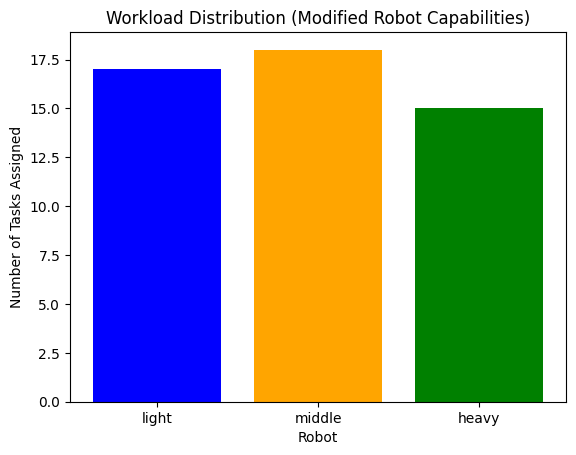

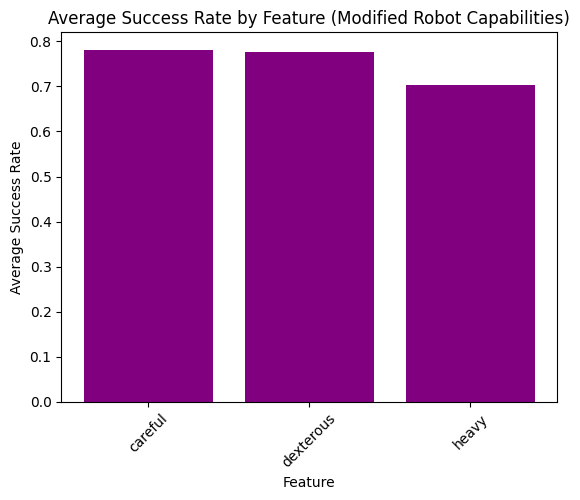

Assigned task 1 (['heavy']) to robot heavy with success probability 0.85
Assigned task 0 (['heavy']) to robot heavy with success probability 0.85
Assigned task 2 (['dexterous']) to robot middle with success probability 0.87
Assigned task 5 (['heavy']) to robot heavy with success probability 0.85
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.81
Assigned task 7 (['careful', 'dexterous']) to robot middle with success probability 0.86
Assigned task 8 (['careful', 'heavy']) to robot heavy with success probability 0.65
Assigned task 4 (['careful', 'heavy']) to robot heavy with success probability 0.65
Assigned task 9 (['careful']) to robot middle with success probability 0.85
Assigned task 11 (['heavy', 'careful']) to robot heavy with success probability 0.65
Assigned task 12 (['heavy']) to robot heavy with success probability 0.85
Assigned task 13 (['careful']) to robot light with success probability 0.65
Assigned task 14 (['heavy']) to robot heavy with s

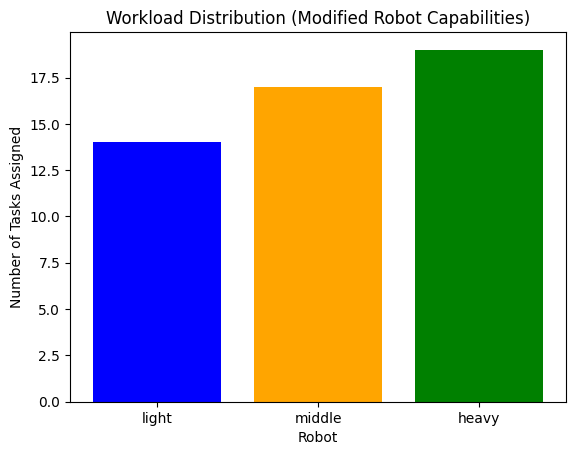

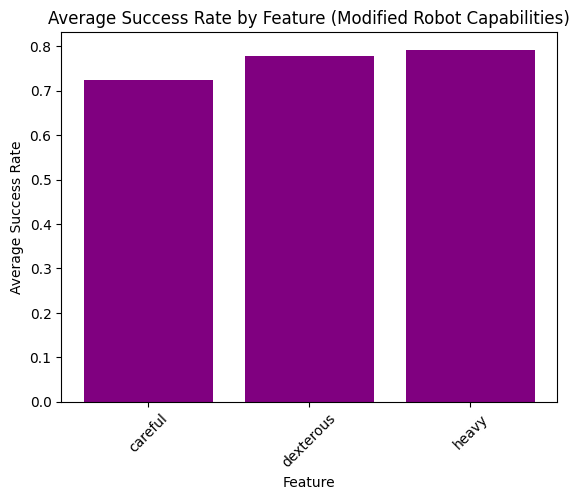

In [ ]:
# Example modified robot success probabilities
robot_capabilities = [
    {  # Light robot dominates careful and dexterous tasks
        "careful": {"light": [0.9, 0.95], "middle": [0.6, 0.8], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.85, 0.9], "middle": [0.6, 0.7], "heavy": [0.3, 0.4]},
        "heavy": {"light": [0.2, 0.3], "middle": [0.5, 0.7], "heavy": [0.7, 0.9]},
    },
    {  # Middle robot excels at all tasks
        "careful": {"light": [0.6, 0.7], "middle": [0.8, 0.9], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.7, 0.8], "middle": [0.85, 0.9], "heavy": [0.4, 0.6]},
        "heavy": {"light": [0.3, 0.4], "middle": [0.7, 0.85], "heavy": [0.8, 0.9]},
    },
]

for cap in robot_capabilities:
    # global success_probabilities
    success_probabilities = cap  # Update the global success probabilities
    robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

    # Plot workload distribution
    plt.bar(robot_task_counts.keys(), robot_task_counts.values(), color=['blue', 'orange', 'green'])
    plt.title("Workload Distribution (Modified Robot Capabilities)")
    plt.xlabel("Robot")
    plt.ylabel("Number of Tasks Assigned")
    plt.show()

    # Plot success rates
    features = list(feature_success_rates.keys())
    avg_success_rates = [np.mean(feature_success_rates[feature]) if feature_success_rates[feature] else 0 for feature in features]

    plt.bar(features, avg_success_rates, color='purple')
    plt.title("Average Success Rate by Feature (Modified Robot Capabilities)")
    plt.xlabel("Feature")
    plt.ylabel("Average Success Rate")
    plt.xticks(rotation=45)
    plt.show()


3. Simulation: Increase Task Count
Analyze system scalability by increasing the number of tasks.



Assigned task 2 (['dexterous']) to robot light with success probability 0.75
Assigned task 1 (['heavy']) to robot heavy with success probability 0.85
Assigned task 4 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 0 (['heavy']) to robot heavy with success probability 0.85
Assigned task 5 (['heavy']) to robot heavy with success probability 0.85
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 8 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 9 (['careful']) to robot middle with success probability 0.85
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.81
Assigned task 11 (['heavy', 'careful']) to robot middle with success probability 0.81
Assigned task 12 (['heavy']) to robot heavy with success probability 0.85
Assigned task 13 (['careful']) to robot light with success probability 0.65
Assigned task 14 (['dexterous']) to robot l

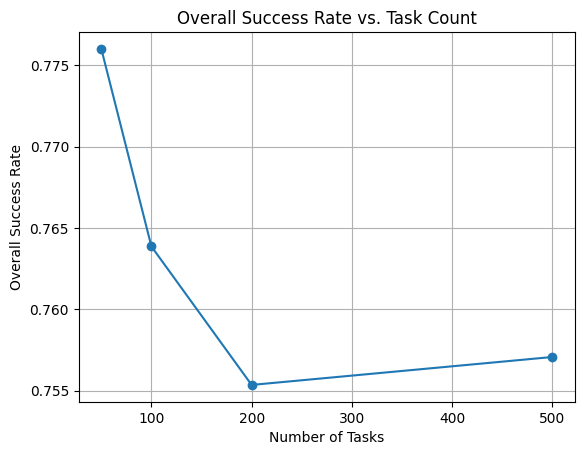

In [ ]:
task_counts = [50, 100, 200, 500]  # Different numbers of tasks
horizon = 3
#explain why this is happening
overall_success_rates = []

for count in task_counts:
    tasks = generate_tasks(count, {"careful": 0.3, "dexterous": 0.4, "heavy": 0.3})
    _, feature_success_rates = run_simulation(tasks, robots, horizon=horizon)
    overall_success_rate = np.mean([np.mean(v) for v in feature_success_rates.values() if v])
    overall_success_rates.append(overall_success_rate)

# Plot success rate vs. task count
plt.plot(task_counts, overall_success_rates, marker='o')
plt.title("Overall Success Rate vs. Task Count")
plt.xlabel("Number of Tasks")
plt.ylabel("Overall Success Rate")
plt.grid()
plt.savefig("overall_success_rate_vs_task_count.png")  # Save the figure
plt.show()


4. Simulation: Horizon Analysis
Analyze the effect of varying the planning horizon (horizon) on success rates and workload distribution.



Assigned task 0 (['heavy']) to robot heavy with success probability 0.85
Assigned task 1 (['heavy']) to robot heavy with success probability 0.85
Assigned task 2 (['dexterous']) to robot light with success probability 0.74
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.81
Assigned task 4 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 5 (['heavy']) to robot heavy with success probability 0.85
Assigned task 6 (['heavy', 'careful']) to robot middle with success probability 0.81
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 8 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 9 (['careful']) to robot light with success probability 0.65
Assigned task 10 (['heavy', 'careful']) to robot middle with success probability 0.81
Assigned task 11 (['heavy', 'careful']) to robot heavy with success probability 0.65
Assigned task 12 (['heav

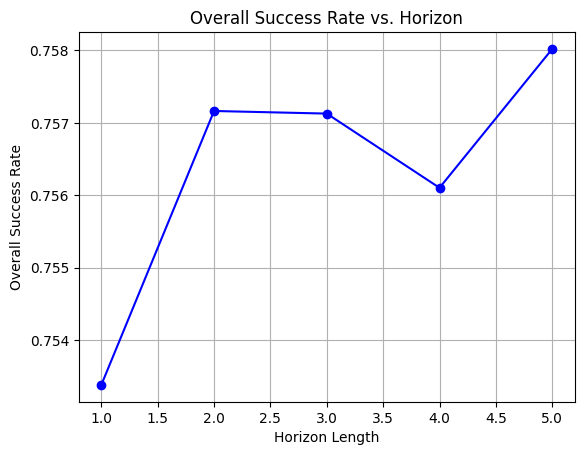

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

horizons = range(1, 6)  # Horizon values from 1 to 5
overall_success_rates = []

for horizon in horizons:
    _, feature_success_rates = run_simulation(tasks, robots, horizon=horizon)
    overall_success_rate = np.mean([np.mean(v) for v in feature_success_rates.values() if v])
    overall_success_rates.append(overall_success_rate)

# Plot success rate vs. horizon
plt.plot(horizons, overall_success_rates, marker='o', color='blue')
plt.title("Overall Success Rate vs. Horizon")
plt.xlabel("Horizon Length")
plt.ylabel("Overall Success Rate")
plt.grid()
plt.savefig("overall_success_rate_vs_horizon.png")  # Save the figure
plt.show()


5. Simulation: Monte Carlo Samples
Analyze the effect of increasing Monte Carlo samples (num_samples) on success rates.



Assigned task 2 (['dexterous']) to robot light with success probability 0.74
Assigned task 1 (['heavy']) to robot heavy with success probability 0.85
Assigned task 4 (['careful', 'dexterous']) to robot light with success probability 0.71
Assigned task 0 (['heavy']) to robot heavy with success probability 0.86
Assigned task 5 (['heavy']) to robot heavy with success probability 0.83
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 8 (['careful', 'dexterous']) to robot light with success probability 0.69
Assigned task 9 (['careful']) to robot middle with success probability 0.86
Assigned task 10 (['heavy', 'careful']) to robot middle with success probability 0.82
Assigned task 11 (['heavy', 'careful']) to robot middle with success probability 0.81
Assigned task 12 (['heavy']) to robot heavy with success probability 0.86
Assigned task 13 (['careful']) to robot light with success probability 0.63
Assigned task 14 (['dexterous']) to robot 

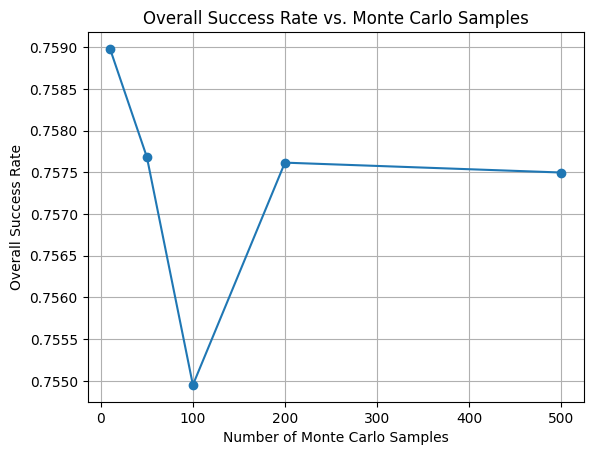

In [ ]:
num_samples_list = [10, 50, 100, 200, 500]  # Different sample sizes
overall_success_rates = []

for num_samples in num_samples_list:
    _, feature_success_rates = run_simulation(tasks, robots, num_samples=num_samples)
    overall_success_rate = np.mean([np.mean(v) for v in feature_success_rates.values() if v])
    overall_success_rates.append(overall_success_rate)

# Plot success rate vs. number of samples
plt.plot(num_samples_list, overall_success_rates, marker='o')
plt.title("Overall Success Rate vs. Monte Carlo Samples")
plt.xlabel("Number of Monte Carlo Samples")
plt.ylabel("Overall Success Rate")
plt.grid()
plt.savefig("overall_success_rate_vs_monte_carlo_samples.png")  # Save the figure
plt.show()


Assigned task 2 (['dexterous']) to robot light with success probability 0.75
Assigned task 0 (['dexterous']) to robot middle with success probability 0.88
Assigned task 1 (['dexterous']) to robot light with success probability 0.75
Assigned task 5 (['heavy']) to robot heavy with success probability 0.85
Assigned task 4 (['careful', 'dexterous']) to robot middle with success probability 0.86
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.70
Assigned task 8 (['careful', 'dexterous']) to robot middle with success probability 0.86
Assigned task 3 (['careful', 'heavy']) to robot heavy with success probability 0.65
Assigned task 10 (['heavy', 'careful']) to robot heavy with success probability 0.65
Assigned task 11 (['dexterous', 'careful']) to robot light with success probability 0.70
Assigned task 12 (['heavy']) to robot heavy with success probability 0.85
Assigned task 9 (['careful']) to robot middle with success probability 0.85
Assigned task 14 (['d

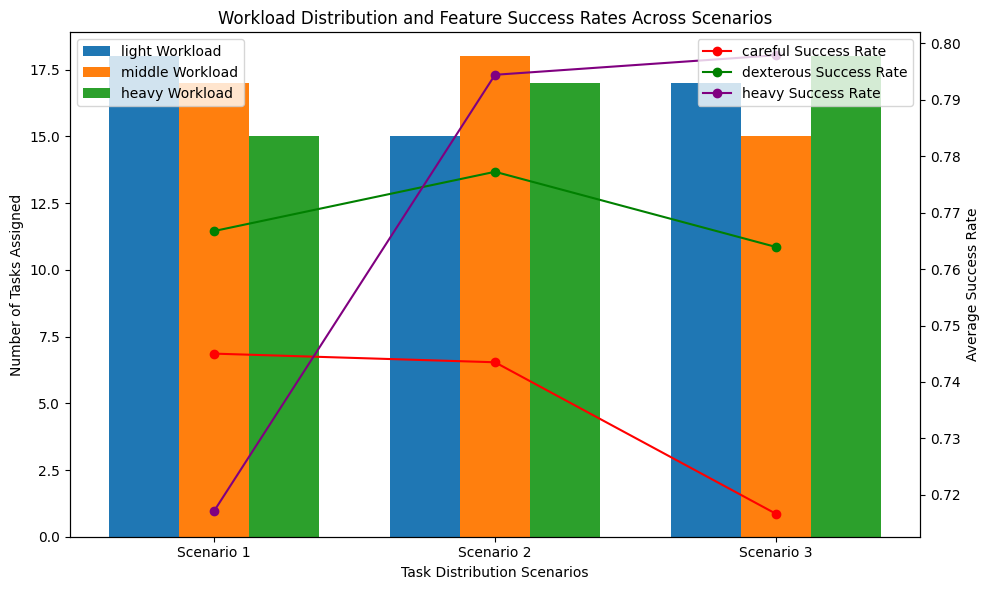

In [ ]:
# Multiple distributions for demonstration for fixed sceanrios
distributions = [
    {"careful": 0.5, "dexterous": 0.3, "heavy": 0.2},  # Careful-dominant
    {"careful": 0.2, "dexterous": 0.5, "heavy": 0.3},  # Dexterous-dominant
    {"careful": 0.3, "dexterous": 0.3, "heavy": 0.4},  # Heavy-dominant
]

# Initialize data containers for combined plotting
robot_workload_data = {robot: [] for robot in robots}
feature_success_rate_data = {feature: [] for feature in success_probabilities.keys()}

# Collect data for each distribution
for dist in distributions:
    tasks = generate_tasks(50, dist)  # Generate 50 tasks per distribution
    robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

    # Add robot workload data
    for robot, count in robot_task_counts.items():
        robot_workload_data[robot].append(count)

    # Add feature success rate data
    for feature, success_rate in feature_success_rates.items():
        feature_success_rate_data[feature].append(np.mean(success_rate) if success_rate else 0)

# Define colors for the features
feature_colors = {
    "careful": "red",
    "dexterous": "green",
    "heavy": "purple"
}

# Plot combined chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot workload distribution (stacked bars)
bar_width = 0.25
x = np.arange(len(distributions))  # X-axis positions for scenarios

for i, robot in enumerate(robot_workload_data.keys()):
    ax1.bar(
        x + i * bar_width,
        robot_workload_data[robot],
        bar_width,
        label=f"{robot} Workload"
    )

ax1.set_xlabel("Task Distribution Scenarios")
ax1.set_ylabel("Number of Tasks Assigned")
ax1.set_title("Workload Distribution and Feature Success Rates Across Scenarios")
ax1.set_xticks(x + bar_width)
ax1.set_xticklabels([f"Scenario {i+1}" for i in range(len(distributions))])
ax1.legend(loc="upper left")

# Plot feature success rates (line plot with distinct colors)
ax2 = ax1.twinx()
for feature, success_rates in feature_success_rate_data.items():
    ax2.plot(
        x + bar_width,
        success_rates,
        marker='o',
        label=f"{feature} Success Rate",
        color=feature_colors[feature]  # Use distinct colors for each feature
    )

ax2.set_ylabel("Average Success Rate")
ax2.legend(loc="upper right")

plt.tight_layout()
plt. savefig("combined_workload_and_success_rates.png")
plt.show()


Assigned task 2 (['dexterous']) to robot light with success probability 0.88
Assigned task 1 (['heavy']) to robot heavy with success probability 0.81
Assigned task 0 (['heavy']) to robot heavy with success probability 0.80
Assigned task 5 (['heavy']) to robot heavy with success probability 0.79
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.65
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.90
Assigned task 8 (['careful', 'heavy']) to robot middle with success probability 0.65
Assigned task 9 (['careful']) to robot light with success probability 0.93
Assigned task 4 (['careful', 'heavy']) to robot middle with success probability 0.65
Assigned task 10 (['heavy', 'careful']) to robot heavy with success probability 0.63
Assigned task 12 (['heavy']) to robot heavy with success probability 0.81
Assigned task 13 (['careful']) to robot light with success probability 0.93
Assigned task 14 (['heavy']) to robot heavy with su

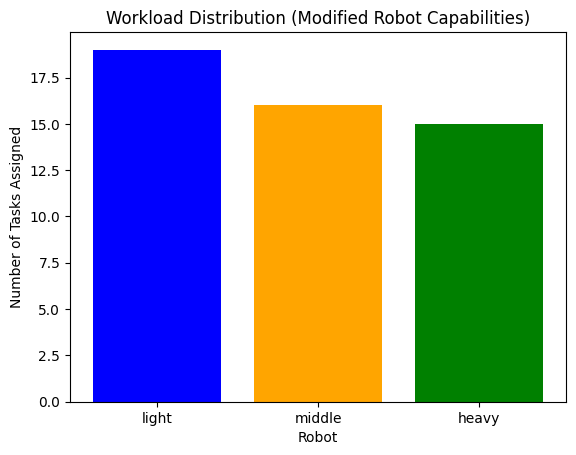

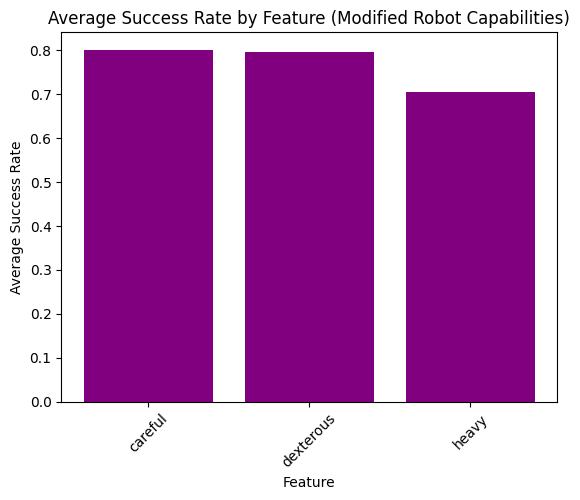

Assigned task 1 (['heavy']) to robot heavy with success probability 0.85
Assigned task 0 (['heavy']) to robot heavy with success probability 0.85
Assigned task 2 (['dexterous']) to robot middle with success probability 0.87
Assigned task 5 (['heavy']) to robot heavy with success probability 0.85
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.81
Assigned task 7 (['careful', 'dexterous']) to robot middle with success probability 0.86
Assigned task 8 (['careful', 'heavy']) to robot heavy with success probability 0.65
Assigned task 9 (['careful']) to robot light with success probability 0.65
Assigned task 4 (['careful', 'heavy']) to robot middle with success probability 0.81
Assigned task 10 (['heavy', 'careful']) to robot heavy with success probability 0.65
Assigned task 12 (['heavy']) to robot heavy with success probability 0.85
Assigned task 13 (['careful']) to robot middle with success probability 0.86
Assigned task 14 (['heavy']) to robot heavy with 

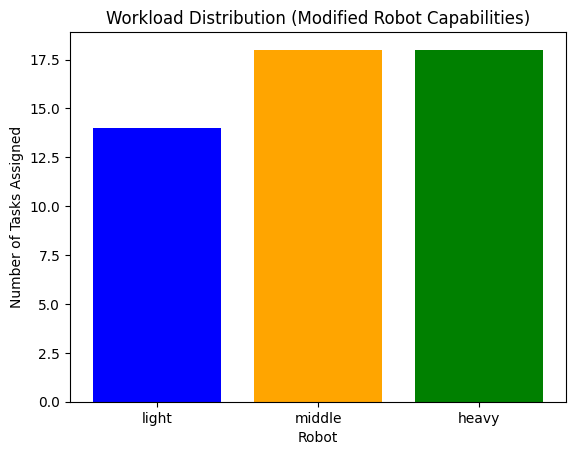

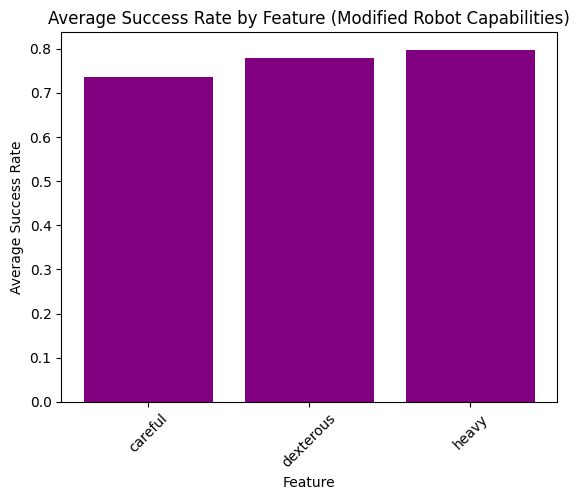

In [ ]:
# Example modified robot success probabilities
robot_capabilities = [
    {  # Light robot dominates careful and dexterous tasks
        "careful": {"light": [0.9, 0.95], "middle": [0.6, 0.8], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.85, 0.9], "middle": [0.6, 0.7], "heavy": [0.3, 0.4]},
        "heavy": {"light": [0.2, 0.3], "middle": [0.5, 0.7], "heavy": [0.7, 0.9]},
    },
    {  # Middle robot excels at all tasks
        "careful": {"light": [0.6, 0.7], "middle": [0.8, 0.9], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.7, 0.8], "middle": [0.85, 0.9], "heavy": [0.4, 0.6]},
        "heavy": {"light": [0.3, 0.4], "middle": [0.7, 0.85], "heavy": [0.8, 0.9]},
    },
]

for cap in robot_capabilities:
    success_probabilities = cap  # Update the global success probabilities
    robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

    # Plot workload distribution
    plt.bar(robot_task_counts.keys(), robot_task_counts.values(), color=['blue', 'orange', 'green'])
    plt.title("Workload Distribution (Modified Robot Capabilities)")
    plt.xlabel("Robot")
    plt.ylabel("Number of Tasks Assigned")
    plt.show()

    # Plot success rates
    avg_success_rates = [np.mean(feature_success_rates[feature]) if feature_success_rates[feature] else 0 for feature in feature_success_rates.keys()]
    plt.bar(feature_success_rates.keys(), avg_success_rates, color='purple')
    plt.title("Average Success Rate by Feature (Modified Robot Capabilities)")
    plt.xlabel("Feature")
    plt.ylabel("Average Success Rate")
    plt.xticks(rotation=45)
    plt.show()


Assigned task 2 (['dexterous']) to robot light with success probability 0.88
Assigned task 3 (['careful', 'heavy']) to robot middle with success probability 0.60
Assigned task 4 (['careful', 'heavy']) to robot middle with success probability 0.60
Assigned task 1 (['heavy']) to robot light with success probability 0.85
Assigned task 6 (['heavy', 'careful']) to robot middle with success probability 0.60
Assigned task 7 (['careful', 'dexterous']) to robot light with success probability 0.90
Assigned task 8 (['careful', 'heavy']) to robot middle with success probability 0.60
Assigned task 9 (['careful']) to robot light with success probability 0.93
Assigned task 10 (['heavy', 'careful']) to robot heavy with success probability 0.40
Assigned task 11 (['heavy', 'careful']) to robot middle with success probability 0.60
Assigned task 0 (['heavy']) to robot light with success probability 0.85
Assigned task 13 (['careful']) to robot light with success probability 0.92
Assigned task 14 (['heavy']

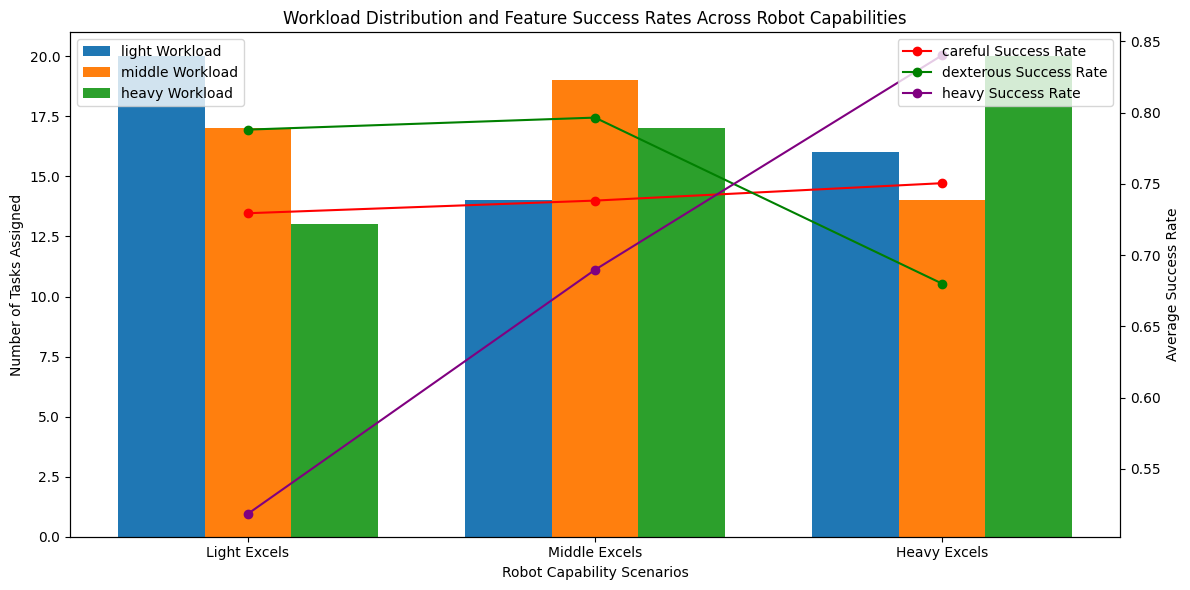

In [ ]:
# Define robot capabilities for three scenarios
robot_capabilities = [
    {  # Light robot excels
        "careful": {"light": [0.9, 0.95], "middle": [0.6, 0.7], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.85, 0.9], "middle": [0.6, 0.7], "heavy": [0.3, 0.4]},
        "heavy": {"light": [0.8, 0.9], "middle": [0.5, 0.6], "heavy": [0.3, 0.4]},
    },
    {  # Middle robot excels
        "careful": {"light": [0.6, 0.7], "middle": [0.9, 0.95], "heavy": [0.4, 0.5]},
        "dexterous": {"light": [0.7, 0.8], "middle": [0.85, 0.9], "heavy": [0.3, 0.4]},
        "heavy": {"light": [0.3, 0.4], "middle": [0.8, 0.9], "heavy": [0.5, 0.6]},
    },
    {  # Heavy robot excels
        "careful": {"light": [0.6, 0.7], "middle": [0.7, 0.8], "heavy": [0.9, 0.95]},
        "dexterous": {"light": [0.6, 0.7], "middle": [0.7, 0.8], "heavy": [0.9, 0.95]},
        "heavy": {"light": [0.4, 0.5], "middle": [0.6, 0.7], "heavy": [0.9, 0.95]},
    },
]

# Data containers for combined plotting
robot_workload_data = {robot: [] for robot in robots}
feature_success_rate_data = {feature: [] for feature in success_probabilities.keys()}

# Collect data for each scenario
for cap in robot_capabilities:
    success_probabilities = cap  # Update the global success probabilities
    robot_task_counts, feature_success_rates = run_simulation(tasks, robots)

    # Add robot workload data
    for robot, count in robot_task_counts.items():
        robot_workload_data[robot].append(count)

    # Add feature success rate data
    for feature, success_rate in feature_success_rates.items():
        feature_success_rate_data[feature].append(np.mean(success_rate) if success_rate else 0)

# Define colors for the features
feature_colors = {
    "careful": "red",
    "dexterous": "green",
    "heavy": "purple"
}

# Plot combined chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot workload distribution (stacked bars)
bar_width = 0.25
x = np.arange(len(robot_capabilities))  # X-axis positions for scenarios

for i, robot in enumerate(robot_workload_data.keys()):
    ax1.bar(
        x + i * bar_width,
        robot_workload_data[robot],
        bar_width,
        label=f"{robot} Workload"
    )

ax1.set_xlabel("Robot Capability Scenarios")
ax1.set_ylabel("Number of Tasks Assigned")
ax1.set_title("Workload Distribution and Feature Success Rates Across Robot Capabilities")
ax1.set_xticks(x + bar_width)
ax1.set_xticklabels(["Light Excels", "Middle Excels", "Heavy Excels"])
ax1.legend(loc="upper left")

# Plot feature success rates (line plot with distinct colors)
ax2 = ax1.twinx()
for feature, success_rates in feature_success_rate_data.items():
    ax2.plot(
        x + bar_width,
        success_rates,
        marker='o',
        label=f"{feature} Success Rate",
        color=feature_colors[feature]  # Use distinct colors for each feature
    )

ax2.set_ylabel("Average Success Rate")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.savefig("Task_Distribution_By_Feature_For_Fixed_Scenarioswith_varying_proabbilityranges.png")
plt.show()